<div style="text-align: right"> Mark Hendricks </div>

<left>FINM 36700</left> 
<br>
<left>Autumn 2020</left>

<h2><center>Midterm #1 </center></h2>

<center>Due on Wednesday, November 4, at 8:30pm.</center>

<h3><center><span style="color:#00008B">Solution</span></center></h3>

# 1 True / False (25 pts)

You are graded for your (brief) explanation.

1.(5 pts) The CAPM implies the intercept of time-series regressions is zero and that the intercept
of the cross-sectional regression is zero.

<span style="color:#00008B">Solution: **True**. CAPM model says that market can fully explain the return of the asset. </span>


2.(5 pts) The Tangency portfolio weights assets in proportion to their Sharpe ratios.

<span style="color:#00008B">Solution: **False**. Weights account for covariances, not just volatilities. Weights are determined based on the solution of optimization problem where we try to minimize the covariance matrix.</span>
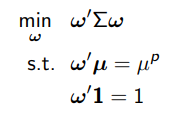

3.(5pts) Suppose we pricing is perfectly modeled by a 2-factor model, but we include a 3rd,
unnecessary, factor in our test. The extra, unnecessary, factor will cause pricing errors.

<span style="color:#00008B">Solution: **False**. The unnecessary pricing factor will not introduce pricing errors. Given that the two factors price perfectly, the third will be extraneous. (There may be a non-zero beta on the 3rd factor, but it will not create time-series alphas nor cross-sectional errors.) </span>

4.(5pts) In a replicating regression, we should include an intercept.

<span style="color:#00008B">Solution: **Either True or False**. Depends on whether we want to replicate the in-sample mean---then do NOT include an intercept. If we want to best replicate the variation, maximize correlation, and ignore the in-sample mean---then YES, include an intercept.</span>

5.(5pts) Suppose we have $k$ risky securities, and an equally weighted portfolio is formed from
them. If pairwise correlations across k security returns are less than perfect, an equally weighted
portfolio becomes riskless as $k \longrightarrow \infty$.

<span style="color:#00008B">Solution: **False**. Portfolio would become riskless only if pairwise correlations across k security returns were zero. In our case, it's not zero, that's why portfolio isn't riskless as $k \longrightarrow \infty$.</span>


# 2 Short Answer (25 pts)
1.(5pts) Why do we prefer to test Linear Factor Pricing Models on portfolios instead of on indi
vidual securities?

<span style="color:#00008B">Solution: Because pricing tests are statistically very noisy. Individual securities have a lot of idiosyncratic risk, while we want to concentrate on systematic risk. And working with portfolios gives us less idiosyncratic risk and higher statistical power.</span>


2.(5pts) Is the Momentum strategy robust to various construction methods? Explain.

<span style="color:#00008B">Solution: Our investigation showed that the momentum strategy is fairly robust to choice of decile and sorting. All these constructions we examined had similar statistical properties, though as we focus only on the top/bottom deciles we get higher mean return and higher volatility. Note that momentum is NOT robust to including the short-side of the construction. Long-only is extremely correlated to the market return and is quite distinct from the long-short construction.</span>


3.(5pts) Suppose we have a security, r . Explain how to construct its information ratio with respect
to a benchmark of z.

<span style="color:#00008B">Solution: 1) Run regression with intercept: $r_t = \alpha + \beta z_t + \epsilon_t $. 2) Calculate standard deviation of residuals ($\sigma_{\epsilon}$). 3) Use the formula $IR = \frac{\alpha}{\epsilon_t}$ and plug in the numbers.</span>


4.Suppose we wish to replicate a hedge-fund return, r, using three ETF products, z1, z2, z3.

   (a) (5pts) Explain how to calculate the proper amount to invest in each of the three ETFs to
achieve optimal correlation to the target hedge-fund.

   <span style="color:#00008B">Solution: Run regression with or without intercept (as explained in 1.4. For instance, without the intercept: $r_t = \beta_1z^1_t + \beta_2z^2_t + \beta_3z^3_t + \epsilon_t $, take betas and invest proportionaly to those betas. </span>

   (b) (5pts) Suppose you add a 4th ETF, z4, to the replication, but it is highly correlated to z3.
Do you think it will increase the replication's correlation to the target in-sample? Out of
sample?

   <span style="color:#00008B">Solution: It must **increase** thre replication's correlation to the target **in-sample**, as more regressors give higher r-squared. But it likely **won't increase** it **out-of-sample** as the high correlation between z3 and z4 means they will be poorly estimated. </span>

# 3 Allocation (30 pts)

**1. Summary Statistics for the 25 test assets.**

   (a) (5pts) Calculate and display the
   - mean
   - volatility
   - Sharpe ratio

of each asset.
Annualize the answers.

**2. Tangency portfolio derived from the 25 assets.**

   (a) (5pts) Calculate and display the weights of the tangency portfolio.

   (b) (10pts) Calculate and display the mean, vol, and Sharpe ratio of the tangency portfolio.
   
**3. Recalculate the tangency portfolio, but instead of using the covariance matrix, use a diagonalized
version which zeros out every element off the main diagonal. (So it is just a matrix of the
variances, with zeros everywhere else.)***

   (a) (5pts) Report the new tangency portfolio weights.
   
   (b) (5pts) Calculate and display the mean, vol, and Sharpe ratio of the diagonalized tangency portfolio.

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.float_format', lambda x: '%.4f' % x)

portf_df = pd.read_excel('ff_data-1.xlsx', "PORTFOLIOS")
portf_df.set_index('date', inplace=True)

factors_df = pd.read_excel('ff_data-1.xlsx', "FACTORS")
factors_df.set_index('date', inplace=True)

df_bm = factors_df.join(portf_df)

In [12]:
# Q1
def q1(data):
    means = data.mean()*12
    stds = data.std()*np.sqrt(12)
    SR = means / stds
    df = pd.DataFrame()
    df['mean'] = means
    df['volatility'] = stds
    df['Sharpe ratio'] = SR
    return df
q1_df = q1(portf_df)
q1_df.style.set_caption('Solution Table 1: mean, volatility and Sharpe ratio of each asset (Annualized)')

,mean,volatility,Sharpe ratio
SMALL LoBM,0.103495,0.418583,0.247252
ME1 BM2,0.116713,0.33915,0.344135
ME1 BM3,0.149719,0.309049,0.48445
ME1 BM4,0.168628,0.287425,0.586684
SMALL HiBM,0.189893,0.319448,0.594443
ME2 BM1,0.110415,0.275426,0.400887
ME2 BM2,0.144464,0.25898,0.55782
ME2 BM3,0.148412,0.249981,0.593692
ME2 BM4,0.155022,0.256299,0.604851
ME2 BM5,0.177465,0.300747,0.590079


In [13]:
# Q2
from numpy.linalg import inv

mu_tilde = portf_df.mean() * 12
std = portf_df.std() * np.sqrt(12)
corr = portf_df.corr()
Sigma = portf_df.cov() * 12
Sigma_inv = inv(Sigma)
N = Sigma.shape[0]

weights_t = Sigma_inv @ mu_tilde / (np.ones(N) @ Sigma_inv @ mu_tilde)
print('Check sum of weights: {:.3f}'.format(weights_t.sum()))

# (a)
q2a_df = pd.DataFrame(weights_t, index=portf_df.columns, columns=['Weights of tangency portfolio'])
display(q2a_df.style.set_caption('Solution Table 2: weights of the tangency portfolio'))

# (b)
tan_portf = portf_df @ weights_t
mean = tan_portf.mean()*12
vol = tan_portf.std() * np.sqrt(12)
SR = mean / vol
q2b_df = pd.DataFrame(index=['Tangency portfolio'])
q2b_df.loc['Tangency portfolio', 'mean'] = mean
q2b_df.loc['Tangency portfolio', 'vol'] = vol 
q2b_df.loc['Tangency portfolio', 'Sharpe ratio'] = SR
display(q2b_df.style.set_caption('Solution Table 3: mean, vol and Sharpe ratio of the tangency portfolio'))

Check sum of weights: 1.000


,Weights of tangency portfolio
SMALL LoBM,-0.313512
ME1 BM2,-0.553649
ME1 BM3,-0.302003
ME1 BM4,0.532169
SMALL HiBM,0.739369
ME2 BM1,-0.646518
ME2 BM2,0.11003
ME2 BM3,0.375722
ME2 BM4,0.30463
ME2 BM5,0.228978


,mean,vol,Sharpe ratio
Tangency portfolio,0.255659,0.217655,1.17461


In [14]:
# Q3
mu_tilde = portf_df.mean() * 12
std = portf_df.std() * np.sqrt(12)
corr = portf_df.corr()
Sigma = portf_df.cov() * 12

for i in Sigma:
    for j in Sigma:
        if i != j:
            Sigma[i][j] = 0
            
Sigma_inv = inv(Sigma)
N = Sigma.shape[0]

weights_t = Sigma_inv @ mu_tilde / (np.ones(N) @ Sigma_inv @ mu_tilde)
print('Check sum of weights: {:.3f}'.format(weights_t.sum()))

# (a)
q3a_df = pd.DataFrame(weights_t, index=portf_df.columns, columns=['Weights of tangency portfolio'])
display(q3a_df.style.set_caption('Solution Table 4: new weights of the tangency portfolio'))

# (b)
tan_portf = portf_df @ weights_t
mean = tan_portf.mean()*12
vol = tan_portf.std() * np.sqrt(12)
SR = mean / vol

q3b_df = pd.DataFrame(index=['Tangency portfolio'])
q3b_df.loc['Tangency portfolio', 'mean'] = mean
q3b_df.loc['Tangency portfolio', 'vol'] = vol
q3b_df.loc['Tangency portfolio', 'Sharpe ratio'] = SR
display(q3b_df.style.set_caption('Solution Table 5: mean, vol and Sharpe ratio of the diagonalized tangency portfolio'))

Check sum of weights: 1.000


,Weights of tangency portfolio
SMALL LoBM,0.0106806
ME1 BM2,0.0183474
ME1 BM3,0.0283438
ME1 BM4,0.0369078
SMALL HiBM,0.0336472
ME2 BM1,0.0263181
ME2 BM2,0.0389462
ME2 BM3,0.042943
ME2 BM4,0.0426717
ME2 BM5,0.0354769


,mean,vol,Sharpe ratio
Tangency portfolio,0.137663,0.227529,0.605036


# 4 Pricing (40pts)

We will test a Linear Factor Pricing Model on the 25 portfolios in **"ff_data.xlsx"**. 

We will use 2 factors: MKT (market) and HML (value).

**1.Do the time-series test.**

   (a) (5pts) Report the mean absolute error (MAE) of the time-series alphas.
   
   (b) (5pts) Report the r-squared of the regressions.
   

**2.Do the cross-sectional test.**

   (a) (5pts) Report the estimated factor premia and compare them to the historic means of the
factors.

   (b) (5pts) Report the intercept, and interpret what it means about the pricing model.
   
   (c) (5pts) Report the r-squared statistic, and interpret what it means about the pricing model.
   

**3.Discuss the evidence against the pricing model...**

   (a) (5pts) Point out which evidence from the time-series regressions rejects the model.
   
   (b) (5pts) Point out which evidence from the cross-sectional regression rejects the model.
   

**4.(5pts) In addition to rejecting the model we tested, do the results above also reject the CAPM? Explain.**

In [18]:
# Q4.1 (a,b)
from sklearn.metrics import mean_absolute_error as mae

bm_portfolios = pd.DataFrame(index=portf_df.columns)
rhs = sm.add_constant(df_bm[['MKT','HML']])

bm_residuals = pd.DataFrame(columns=portf_df.columns)
t_p_values = pd.DataFrame()

for portf in bm_portfolios.index:
    lhs = df_bm[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    bm_portfolios.loc[portf, 'alpha_hat'] = res.params['const']
    bm_portfolios.loc[portf, 'beta_MKT'] = res.params['MKT']
    bm_portfolios.loc[portf, 'beta_HML'] = res.params['HML']
    bm_portfolios.loc[portf, '$R^2$'] = res.rsquared

mae_alpha = np.mean(np.abs(bm_portfolios['alpha_hat'].values))

display(bm_portfolios)

print("MAE of alphas = {:.5f}".format(mae_alpha))
print("\nR-squared average = {:.3f}".format(bm_portfolios['$R^2$'].mean()))

,alpha_hat,beta_MKT,beta_HML,$R^2$
SMALL LoBM,-0.0033,1.5421,0.4685,0.5281
ME1 BM2,-0.0003,1.3551,0.2890,0.5949
ME1 BM3,0.0020,1.2748,0.5752,0.7165
ME1 BM4,0.0041,1.1648,0.6378,0.7318
SMALL HiBM,0.0044,1.2199,0.9726,0.7606
ME2 BM1,0.0011,1.2901,-0.1674,0.7286
ME2 BM2,0.0034,1.1960,0.1807,0.7735
ME2 BM3,0.0034,1.1327,0.3972,0.8184
ME2 BM4,0.0035,1.1122,0.6066,0.8379
ME2 BM5,0.0035,1.2363,0.9220,0.8524


MAE of alphas = 0.00272

R-squared average = 0.828


In [19]:
# Q4.2 (a,b,c)
rhs = sm.add_constant(bm_portfolios[['beta_MKT','beta_HML']])
lhs = df_bm[bm_portfolios.index.values].mean()
reg_cross = sm.OLS(lhs, rhs, missing='drop').fit()

q4ab1_df = pd.DataFrame(reg_cross.params, columns=['Estimation'])

display(q4ab1_df.T.style.set_caption('Solution Table 6: estimated factor premia and intercept'))

q4ab2_df = pd.DataFrame(factors_df.mean().loc[['MKT', 'HML']], columns=['Historic']).T
display(q4ab2_df.style.set_caption('Solution Table 7: historic means of the factors'))

reg_cross.summary()

,const,beta_MKT,beta_HML
Estimation,0.0107134,-0.000438466,0.00325057


,MKT,HML
Historic,0.00673805,0.00324531


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     9.362
Date:                Wed, 11 Nov 2020   Prob (F-statistic):            0.00114
Time:                        18:56:50   Log-Likelihood:                 129.11
No. Observations:                  25   AIC:                            -252.2
Df Residuals:                      22   BIC:                            -248.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0107      0.003      4.244      0.000       0.005       0.016
beta_MKT      -0.0004      0.002     -0.199      0.844      -0.005       0.004
beta_HML       0.0033      0.001      4.289      0.000       0.002       0.005
==============================================================================
Omnibus:                        2.512   Durbin-Watson:                   0.698
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                1.658
Skew:                          -0.631   Prob(JB):                        0.436
Kurtosis:                       3.021   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color:#00008B">**Q 4.2. Solution:**</span>

- <span style="color:#00008B"> (a) See Solution Table 6 and Table 7 for the estimated factor premia and historic means of the factors. The factor premia obtained from cross-section regression is close to historic mean for HML factor, but it is slightly different for MKT factor</span>


- <span style="color:#00008B"> (b) See Solution Table 6 for the intercept. The intercept of the cross sectional regression is $0.0107$ which is not zero. IF our model is perfect and our factor explains the expected return of the portfolios then intercept should be zero. Hence, we might need to consider some other factors. </span>


- <span style="color:#00008B"> (c) See Solution Table "OLS Regression Results". $R^2 = 46\%$ which means our factor explain only $46\%$ of the varaition in expected return. If the factors considered are sufficient, then we would be able to explain 100% of variation in expected return. </span>


<span style="color:#00008B">**Q 4.3. Solution:**</span>

- <span style="color:#00008B"> (a) MAE error from Q4.1(a) was non-zero which implies that pricing model was not perfect. All alpha should be significantly zero for accpeting the pricing model. </span>


- <span style="color:#00008B"> (b) Both non-zero intercept and low *cross-sectional* $R^2$ rejects the pricing model. </span>


<span style="color:#00008B">**Q 4.4. Solution:**</span>

<span style="color:#00008B"> We are using two factors here in the cross-sectional regression. Reducing the cross-sectional regression to just one of those two factors **must** make it fit worse. Thus, if the model is rejected for two factors (MKT and HML), then it is rejected for one factor i.e. MKT. Hence, we can reject CAPM as well.

<span style="color:#00008B"> You did not need to do this, but from the summary stats, p-value of the constant/intercept from cross-sectional regression is less than 0.05, which implies that intercept is significantly non-zero. </span>